<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n20.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,43.004732,92.619922,17.711620,163.336274,145.313190,18.023083
1,0.0,1.0,84.682471,99.580115,54.695667,248.958254,188.460221,60.498033
2,0.0,2.0,94.009830,25.960218,-27.208080,102.761968,128.572754,-25.810785
3,0.0,3.0,78.140749,92.517531,-14.215858,166.442421,176.165173,-9.722752
4,0.0,4.0,77.294053,88.722711,18.566094,194.582858,171.909000,22.673858
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,67.325732,56.533478,-21.427498,112.431712,132.609791,-20.178079
249996,999.0,246.0,29.418356,74.175164,21.502669,135.096189,109.091558,26.004630
249997,999.0,247.0,60.719238,36.185159,9.814856,116.719253,105.533893,11.185361
249998,999.0,248.0,69.413830,53.105526,16.197602,148.716957,131.495843,17.221114


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,43.004732,92.619922,17.711620,163.336274,145.313190,18.023083
1,0.0,1.0,84.682471,99.580115,54.695667,248.958254,188.460221,60.498033
2,0.0,2.0,94.009830,25.960218,-27.208080,102.761968,128.572754,-25.810785
3,0.0,3.0,78.140749,92.517531,-14.215858,166.442421,176.165173,-9.722752
4,0.0,4.0,77.294053,88.722711,18.566094,194.582858,171.909000,22.673858
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,67.325732,56.533478,-21.427498,112.431712,132.609791,-20.178079
249996,999.0,246.0,29.418356,74.175164,21.502669,135.096189,109.091558,26.004630
249997,999.0,247.0,60.719238,36.185159,9.814856,116.719253,105.533893,11.185361
249998,999.0,248.0,69.413830,53.105526,16.197602,148.716957,131.495843,17.221114


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    43.004732  92.619922  17.711620  163.336274  145.313190   
      1.0    84.682471  99.580115  54.695667  248.958254  188.460221   
      2.0    94.009830  25.960218 -27.208080  102.761968  128.572754   
      3.0    78.140749  92.517531 -14.215858  166.442421  176.165173   
      4.0    77.294053  88.722711  18.566094  194.582858  171.909000   
...                ...        ...        ...         ...         ...   
999.0 245.0  67.325732  56.533478 -21.427498  112.431712  132.609791   
      246.0  29.418356  74.175164  21.502669  135.096189  109.091558   
      247.0  60.719238  36.185159   9.814856  116.719253  105.533893   
      248.0  69.413830  53.105526  16.197602  148.716957  131.495843   
      249.0  75.322372  43.279261  21.364627  149.966260  128.219763   

                 e_hat  
rep   index             
0.0   0.0    18.023083  
      1.0    60.498033  
      2.0   -25.810785  
      3.0    -9.722752  
      4.0    22.673858  
...                ...  
999.0 245.0 -20.178079  
      246.0  26.004630  
      247.0  11.185361  
      248.0  17.221114  
      249.0  21.746498  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    43.004732  92.619922  17.711620  163.336274  145.313190   
      1.0    84.682471  99.580115  54.695667  248.958254  188.460221   
      2.0    94.009830  25.960218 -27.208080  102.761968  128.572754   
      3.0    78.140749  92.517531 -14.215858  166.442421  176.165173   
      4.0    77.294053  88.722711  18.566094  194.582858  171.909000   
...                ...        ...        ...         ...         ...   
999.0 245.0  67.325732  56.533478 -21.427498  112.431712  132.609791   
      246.0  29.418356  74.175164  21.502669  135.096189  109.091558   
      247.0  60.719238  36.185159   9.814856  116.719253  105.533893   
      248.0  69.413830  53.105526  16.197602  148.716957  131.495843   
      249.0  75.322372  43.279261  21.364627  149.966260  128.219763   

                 e_hat  
rep   index             
0.0   0.0    18.023083  
      1.0    60.498033  
      2.0   -25.810785  
      3.0    -9.722752  
      4.0    22.673858  
...                ...  
999.0 245.0 -20.178079  
      246.0  26.004630  
      247.0  11.185361  
      248.0  17.221114  
      249.0  21.746498  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,43.004732,92.619922,17.711620,163.336274,145.313190,18.023083
1,0.0,1.0,84.682471,99.580115,54.695667,248.958254,188.460221,60.498033
2,0.0,2.0,94.009830,25.960218,-27.208080,102.761968,128.572754,-25.810785
3,0.0,3.0,78.140749,92.517531,-14.215858,166.442421,176.165173,-9.722752
4,0.0,4.0,77.294053,88.722711,18.566094,194.582858,171.909000,22.673858
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,67.325732,56.533478,-21.427498,112.431712,132.609791,-20.178079
249996,999.0,246.0,29.418356,74.175164,21.502669,135.096189,109.091558,26.004630
249997,999.0,247.0,60.719238,36.185159,9.814856,116.719253,105.533893,11.185361
249998,999.0,248.0,69.413830,53.105526,16.197602,148.716957,131.495843,17.221114


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    43.004732  92.619922  17.711620  163.336274  145.313190   
      1.0    84.682471  99.580115  54.695667  248.958254  188.460221   
      2.0    94.009830  25.960218 -27.208080  102.761968  128.572754   
      3.0    78.140749  92.517531 -14.215858  166.442421  176.165173   
      4.0    77.294053  88.722711  18.566094  194.582858  171.909000   
...                ...        ...        ...         ...         ...   
999.0 245.0  67.325732  56.533478 -21.427498  112.431712  132.609791   
      246.0  29.418356  74.175164  21.502669  135.096189  109.091558   
      247.0  60.719238  36.185159   9.814856  116.719253  105.533893   
      248.0  69.413830  53.105526  16.197602  148.716957  131.495843   
      249.0  75.322372  43.279261  21.364627  149.966260  128.219763   

                 e_hat  
rep   index             
0.0   0.0    18.023083  
      1.0    60.498033  
      2.0   -25.810785  
      3.0    -9.722752  
      4.0    22.673858  
...                ...  
999.0 245.0 -20.178079  
      246.0  26.004630  
      247.0  11.185361  
      248.0  17.221114  
      249.0  21.746498  

[250000 rows x 6 columns]

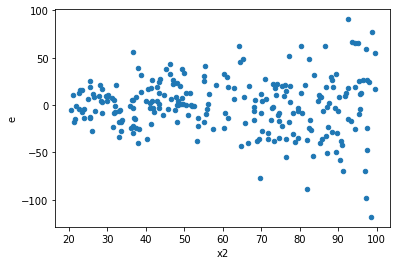

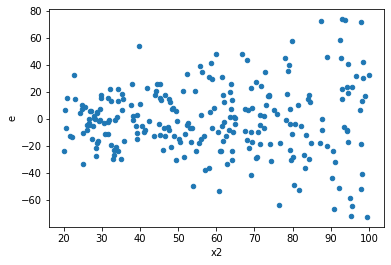

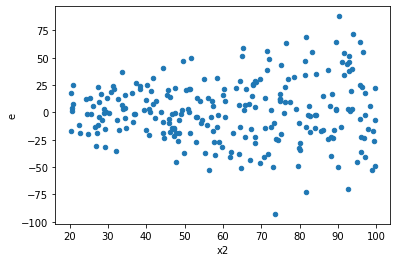

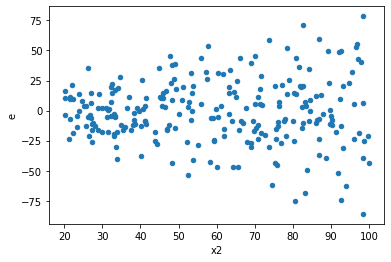

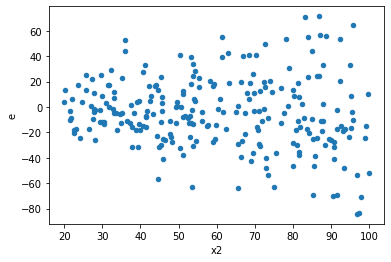

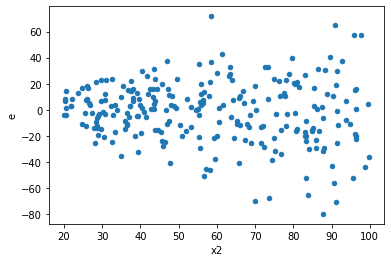

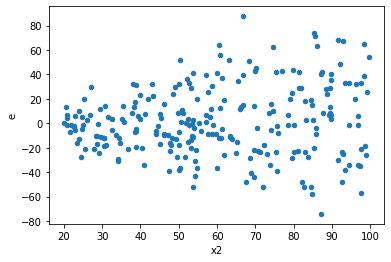

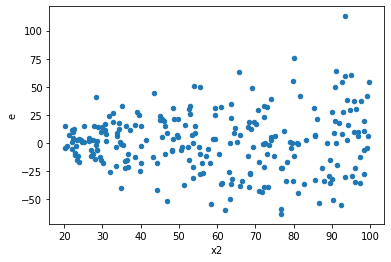

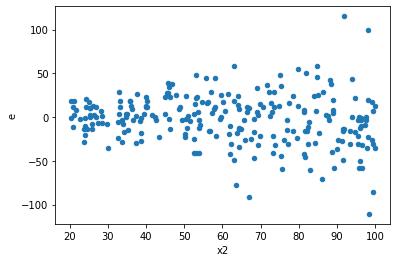

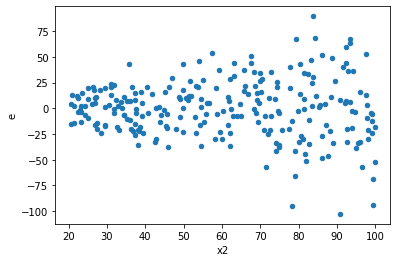

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,31219.353474001982,137553.77200272333,318.56483136736716,1403.609918395136,4.406041659936093,2.170708057747106e-12,0.9999999999989146,1.085354028873553e-12,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,24933.286164187135,111808.12214415758,254.42128738966466,1140.8992055526282,4.484291457126614,1.247890679678676e-12,0.999999999999376,6.23945339839338e-13,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,33808.33793163334,125446.69004129453,344.98304011870755,1280.0682657274951,3.7105252052014723,3.796092329366729e-10,0.9999999998101954,1.8980461646833646e-10,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,30096.10323192032,109494.32654434438,307.10309420326854,1117.2890463708611,3.638156265632864,6.666305285563112e-10,0.9999999996666847,3.333152642781556e-10,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,34885.99385111544,115798.4138974027,355.97952909301466,1181.616468340844,3.319338253386185,8.447153421187181e-09,0.9999999957764233,4.223576710593591e-09,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,22243.944251408324,81872.83740847796,226.97902297355432,835.4371164130405,3.680679850800039,4.785531970696866e-10,0.9999999997607234,2.392765985348433e-10,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,31641.655457707595,121116.9138904941,322.8740352827306,1235.8868764336132,3.8277679261244595,1.540605421013197e-10,0.9999999999229697,7.703027105065985e-11,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,29210.52579411336,103494.26488213046,298.06658973585064,1056.0639273686782,3.543046969150658,1.4077892185326846e-09,0.9999999992961054,7.038946092663423e-10,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,30148.797538159688,113722.90291094972,307.6407912057111,1160.4377848056095,3.772054350327217,2.3610313704125474e-10,0.9999999998819484,1.1805156852062737e-10,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,31219.353474001982,137553.77200272333,318.56483136736716,1403.609918395136,4.406041659936093,2.170708057747106e-12,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,24933.286164187135,111808.12214415758,254.42128738966466,1140.8992055526282,4.484291457126614,1.247890679678676e-12,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,33808.33793163334,125446.69004129453,344.98304011870755,1280.0682657274951,3.7105252052014723,3.796092329366729e-10,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,30096.10323192032,109494.32654434438,307.10309420326854,1117.2890463708611,3.638156265632864,6.666305285563112e-10,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,34885.99385111544,115798.4138974027,355.97952909301466,1181.616468340844,3.319338253386185,8.447153421187181e-09,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,22243.944251408324,81872.83740847796,226.97902297355432,835.4371164130405,3.680679850800039,4.785531970696866e-10,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,31641.655457707595,121116.9138904941,322.8740352827306,1235.8868764336132,3.8277679261244595,1.540605421013197e-10,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,29210.52579411336,103494.26488213046,298.06658973585064,1056.0639273686782,3.543046969150658,1.4077892185326846e-09,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,30148.797538159688,113722.90291094972,307.6407912057111,1160.4377848056095,3.772054350327217,2.3610313704125474e-10,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64